In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
data=pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [3]:
data.head(3)
#data.tail(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [4]:
data.shape

(100000, 9)

In [5]:
data.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:

data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [10]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [11]:
# 1. One-Hot Encoding for 'gender' column
data = data.rename(columns={'gender_Male': 'gender'})#no order involve
data = pd.get_dummies(data, columns=['gender'], drop_first=True)


# 2. Label Encoding for 'smoking_history' column
encoder = LabelEncoder()
data['smoking_history'] = encoder.fit_transform(data['smoking_history'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   smoking_history      100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
 8   gender_Male          100000 non-null  bool   
 9   gender_Other         100000 non-null  bool   
dtypes: bool(2), float64(3), int64(5)
memory usage: 6.3 MB


In [13]:
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
0,80.0,0,1,4,25.19,6.6,140,0,False,False
1,54.0,0,0,0,27.32,6.6,80,0,False,False
2,28.0,0,0,4,27.32,5.7,158,0,True,False
3,36.0,0,0,1,23.45,5.0,155,0,False,False
4,76.0,1,1,1,20.14,4.8,155,0,True,False


In [14]:
data['bmi'].min()

10.01

In [15]:
data.duplicated().sum()

np.int64(3854)

In [16]:
data.drop_duplicates(inplace=True)


In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data['diabetes'].nunique()

2

In [19]:
class_counts=data['diabetes'].value_counts()

In [20]:
print(class_counts)

diabetes
0    87664
1     8482
Name: count, dtype: int64


In [21]:
from imblearn.combine import SMOTEENN

X = data.drop(columns=['diabetes'])
y = data['diabetes']

<ipython-input-22-53ac55703a09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


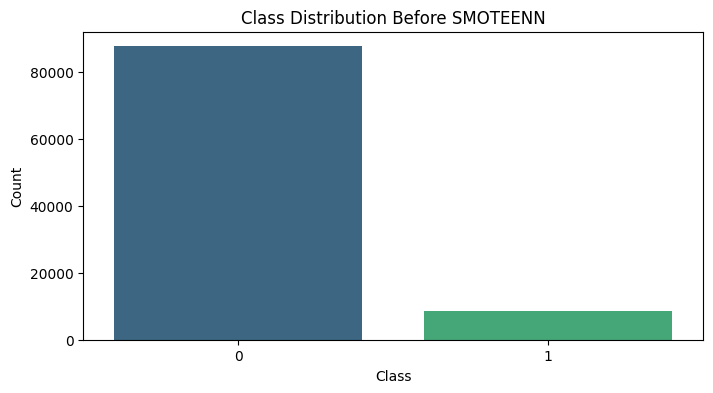

In [22]:
# 📌 Visualizing Original Class Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution Before SMOTEENN")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [23]:
# 📌 Apply SMOTEENN
smote_enn = SMOTEENN(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)



<ipython-input-24-332ef8c6fe3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="viridis")


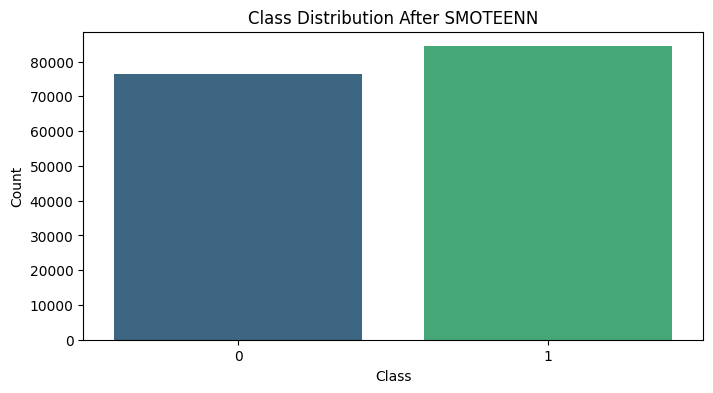

In [24]:
# 📌 Visualizing Class Distribution After SMOTEENN
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTEENN")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



In [25]:
# 📌 Print new class distribution
print(pd.Series(y_resampled).value_counts())

diabetes
1    84367
0    76443
Name: count, dtype: int64


In [26]:
correlation=data.corr()['diabetes']
correlation

,diabetes
age,0.264927
hypertension,0.195710
heart_disease,0.170711
smoking_history,0.088471
bmi,0.214932
HbA1c_level,0.406408
blood_glucose_level,0.424336
diabetes,1.000000
gender_Male,0.037883
gender_Other,-0.004256


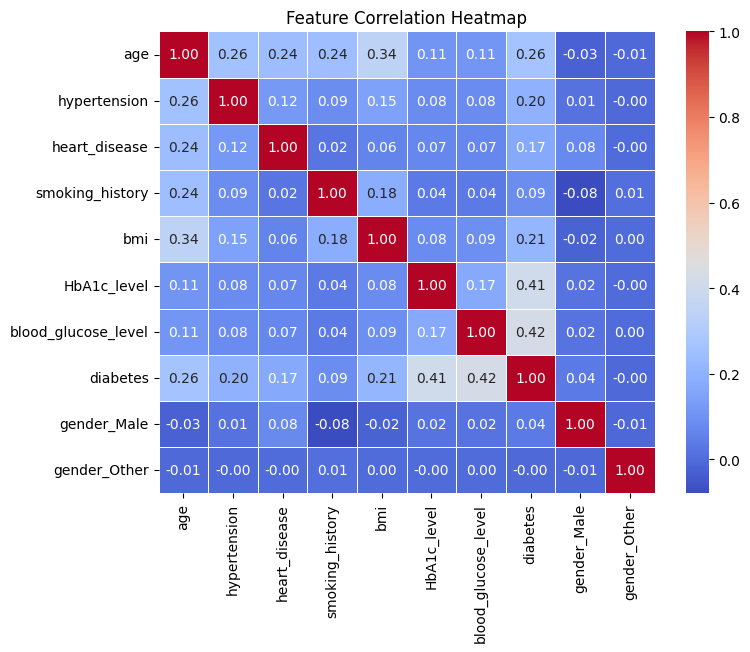

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [31]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define Naive Bayes models
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Bernoulli Naive Bayes": BernoulliNB()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict labels

    # Some models do not support predict_proba, handling it accordingly
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for AUC-ROC
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None  # If not applicable

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

# Display results
print(results_df)


                     Model  Accuracy  Precision    Recall  F1-Score
0     Gaussian Naive Bayes  0.873702   0.820227  0.972382  0.889847
1  Multinomial Naive Bayes  0.678596   0.691223  0.700113  0.695639
2    Bernoulli Naive Bayes  0.657204   0.706614  0.592663  0.644641


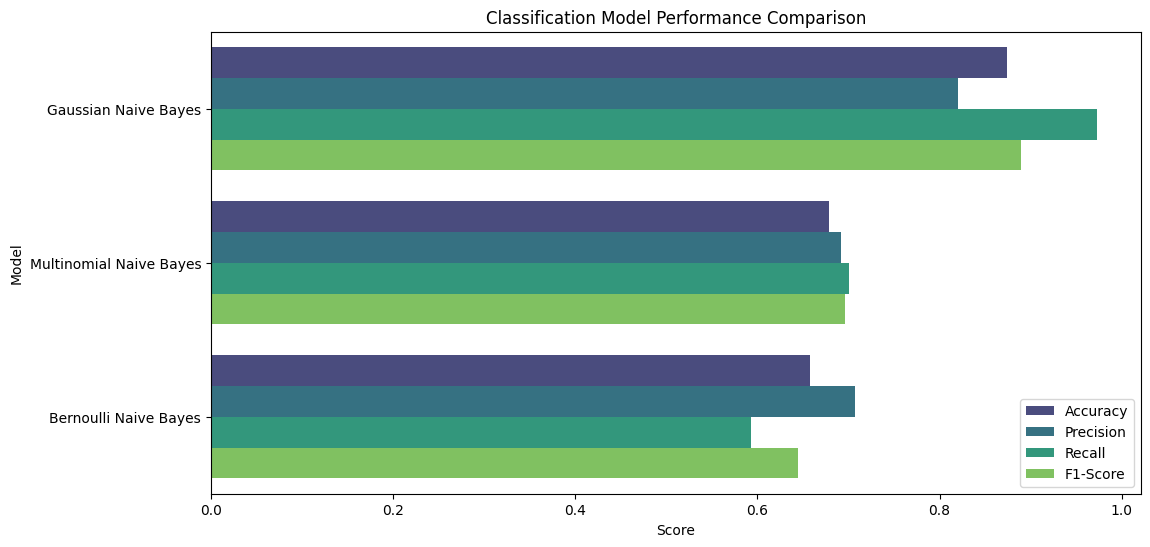

In [32]:
# Set figure size
plt.figure(figsize=(12, 6))

# Melt DataFrame for visualization
df_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot performance metrics
sns.barplot(x="Score", y="Model", hue="Metric", data=df_melted, palette="viridis")

# Add title and labels
plt.title("Classification Model Performance Comparison")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(loc="lower right")
plt.show()
